In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

df = pd.read_csv("../data/raw_data.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Compute overall churn rate

In [2]:
overall_churn_rate = df['Exited'].mean()
print(f"Overall Churn Rate: {overall_churn_rate:.2%}")

Overall Churn Rate: 20.37%


#### Churn by geography

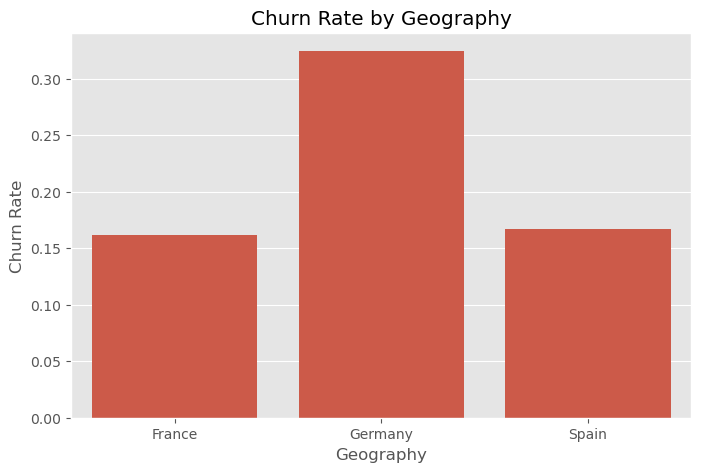

In [ ]:
churn_geo = (
    df.groupby("Geography")["Exited"]
        .agg(["count", "sum", "mean"])
        .reset_index()
        .rename(columns={
            "count": "Total_customers",
            "sum": "Totle_churned",
            "mean": "Churn_rate"
        })
)

# Export as .csv
churn_geo.to_csv("../data/churn_by_geography.csv", index=False)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(data=churn_geo, x="Geography", y="Churn_rate")
plt.title("Churn Rate by Geography")
plt.ylabel("Churn Rate")
plt.show()

#### Churn by tenure bands

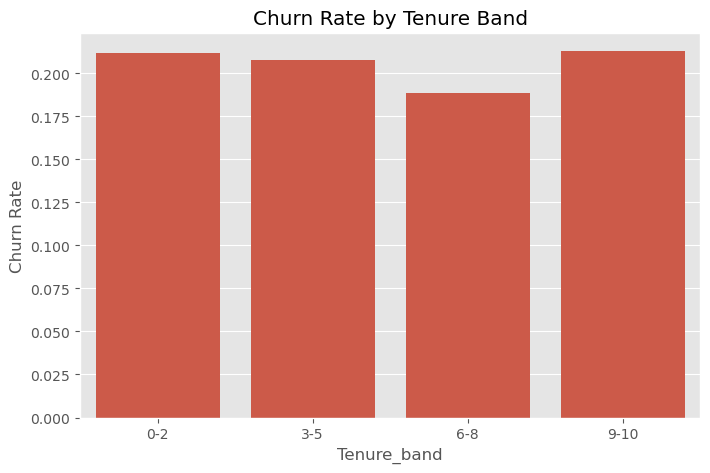

In [ ]:
df['Tenure_band'] = pd.cut(
    df['Tenure'],
    bins=[0, 2, 5, 8, 10],
    labels=["0-2", "3-5", "6-8", "9-10"],
    include_lowest=True
)

churn_tenure = (
    df.groupby("Tenure_band", observed=True)["Exited"]
        .agg(["count", "sum", "mean"])
        .reset_index()
        .rename(columns={
            "count": "Total_customers",
            "sum": "Total_churned",
            "mean": "Churn_rate"
        })
)

# Export as .csv
churn_tenure.to_csv("../data/churn_by_tenure.csv", index=False)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(data=churn_tenure, x="Tenure_band", y="Churn_rate")
plt.title("Churn Rate by Tenure Band")
plt.ylabel("Churn Rate")
plt.show()

#### Churn by age bands

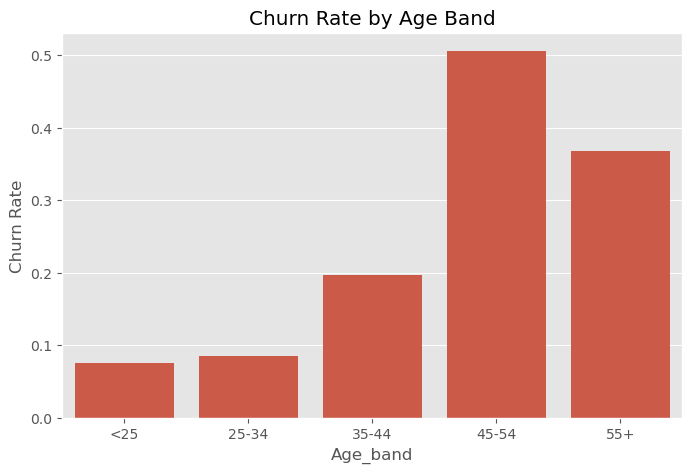

In [ ]:
df['Age_band'] = pd.cut(
    df['Age'],
    bins=[0, 25, 35, 45, 55, 100],
    labels=["<25", "25-34", "35-44", "45-54", "55+"],
    include_lowest=True
)

churn_age = (
    df.groupby("Age_band", observed=True)["Exited"]
        .agg(["count", "sum", "mean"])
        .reset_index()
        .rename(columns={
            "count": "Total_customers",
            "sum": "Total_churned",
            "mean": "Churn_rate"
        })
)

# Export as .csv
churn_age.to_csv("../data/churn_by_age.csv", index=False)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(data=churn_age, x="Age_band", y="Churn_rate")
plt.title("Churn Rate by Age Band")
plt.ylabel("Churn Rate")
plt.show()

#### Churn by number of products

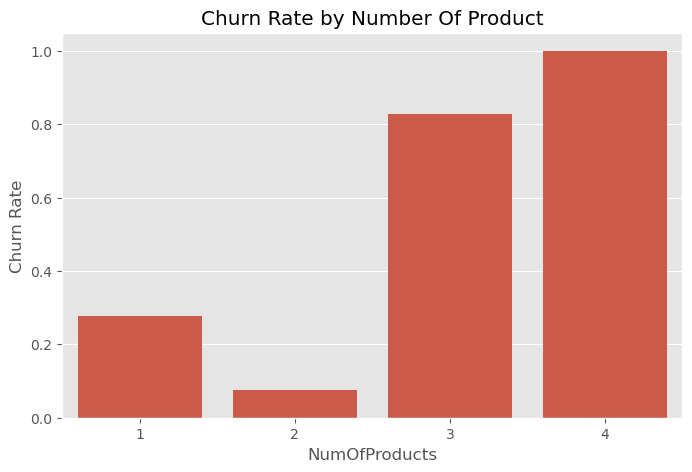

In [ ]:
churn_product = (
    df.groupby("NumOfProducts")["Exited"]
        .agg(["count", "sum", "mean"])
        .reset_index()
        .rename(columns={
            "count": "Total_customers",
            "sum": "Total_churned",
            "mean": "Churn_rate"
        })
)

# Export as .csv
churn_product.to_csv("../data/churn_by_products.csv", index=False)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(data=churn_product, x="NumOfProducts", y="Churn_rate")
plt.title("Churn Rate by Number Of Product")
plt.ylabel("Churn Rate")
plt.show()

#### Churn by active membership

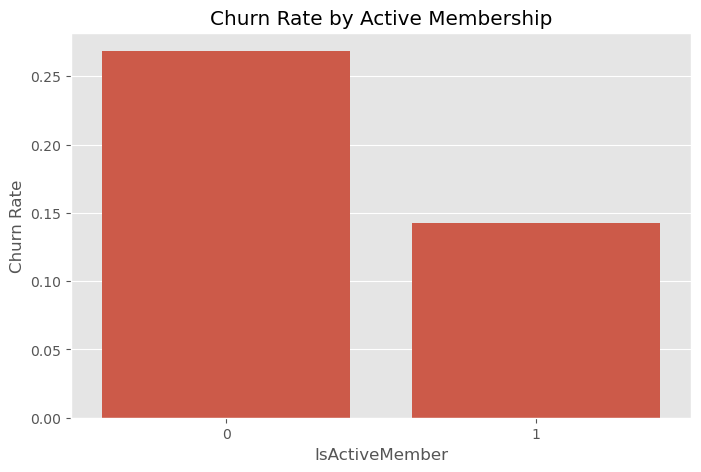

In [ ]:
churn_activeMem = (
    df.groupby("IsActiveMember")["Exited"]
        .agg(["count", "sum", "mean"])
        .reset_index()
        .rename(columns={
            "count": "Total_customers",
            "sum": "Total_churned",
            "mean": "Churn_rate"
        })
)

# Export as .csv
churn_activeMem.to_csv("../data/churn_by_active_member.csv", index=False)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(data=churn_activeMem, x="IsActiveMember", y="Churn_rate")
plt.title("Churn Rate by Active Membership")
plt.ylabel("Churn Rate")
plt.show()